In [48]:
import pandas as pd
df = pd.read_excel('name_data.xlsx')

In [49]:
df.head()

,名前（漢字）,名前（カナ）,性別
0,健太,ｹﾝﾀ,1
1,翔太,ｼｮｳﾀ,1
2,大輔,ﾀﾞｲｽｹ,1
3,拓也,ﾀｸﾔ,1
4,誠,ﾏｺﾄ,1


In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
# データを訓練用とテスト用に分ける。
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## 名前（漢字）をngramに変換した特徴量を使って性別判定する

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
# CountVectorizerを設定する。（文字単位、ngramの範囲は1～2）
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2))

In [54]:
# 特徴量を計算（fit）する。
# （訓練データで計算（fit）してから、その結果を使って訓練データとテストデータを変換（transform）する。）
vectorizer.fit(X_train['名前（漢字）'])

CountVectorizer(analyzer='char', ngram_range=(1, 2))

In [55]:
# 参考に特徴量名を取り出して眺めてみる。
feature_kanji = vectorizer.get_feature_names()
print(feature_kanji)

['々', '々子', '々美', 'あ', 'あか', 'あす', 'あゆ', 'あり', 'い', 'いず', 'いづ', 'お', 'おり', 'おる', 'か', 'かお', 'かね', 'かり', 'かる', 'き', 'く', 'くら', 'くる', 'ぐ', 'ぐみ', 'さ', 'さお', 'さく', 'さと', 'さゆ', 'し', 'しの', 'す', 'すか', 'すみ', 'ず', 'ずき', 'ずみ', 'た', 'づ', 'づき', 'づみ', 'と', 'とみ', 'ど', 'どか', 'な', 'なた', 'なの', 'ね', 'の', 'のか', 'のぶ', 'のり', 'は', 'はる', 'ひ', 'ひか', 'ひと', 'ひな', 'ひろ', 'ぶ', 'ほ', 'ほの', 'ま', 'まど', 'まゆ', 'み', 'みず', 'みづ', 'みの', 'みゆ', 'みれ', 'め', 'めぐ', 'ゆ', 'ゆか', 'ゆき', 'ゆみ', 'ゆり', 'ら', 'り', 'りさ', 'る', 'るか', 'るみ', 'れ', 'ろ', 'ろみ', '一', '一也', '一哉', '一夫', '一希', '一平', '一幸', '一弘', '一彦', '一成', '一樹', '一男', '一真', '一貴', '一輝', '一郎', '一馬', '七', '七海', '乃', '久', '之', '之介', '也', '二', '亘', '亜', '亜季', '亜実', '亜希', '亜由', '亜紀', '亨', '京', '京介', '京子', '京香', '亮', '亮介', '亮佑', '亮太', '亮平', '亮祐', '亮輔', '人', '仁', '仁志', '仁美', '介', '代', '代子', '伸', '伸一', '伸也', '伸子', '佐', '佐子', '佐知', '佑', '佑太', '佑斗', '佑輔', '佑香', '作', '佳', '佳代', '佳祐', '侑', '侑也', '依', '俊', '俊一', '俊也', '俊幸', '俊彦', '保', '信', '信一', '信之', '信吾', '信子', '信行', '修', '修一', '修司', '修平', '健', '健一

In [56]:
# データXを特徴量に変換（transform）する。
# （訓練データで計算（fit）してから、その結果を使って訓練データとテストデータを変換（transform）する。）
X_train_vec_kanji = vectorizer.transform(X_train['名前（漢字）'])
X_test_vec_kanji = vectorizer.transform(X_test['名前（漢字）'])

In [57]:
# 参考に変換後の訓練データを眺めてみる。
# 特徴量を全部見るのは量が多くて大変なので100個おきに飛ばしながら
# ほとんどの要素は0だが、たまに1が現れるので、その場合はプリントする。

i = 0 # 訓練データのi番目に注目する。
n_kanji = len(feature_kanji)
for j in range(n_kanji):
    if j % 100 == 0:
        print(X_train.iloc[i,0], j, feature_kanji[j], X_train_vec_kanji[i,j])
    if X_train_vec_kanji[i,j] != 0:
        print(X_train.iloc[i,0], j, feature_kanji[j], X_train_vec_kanji[i,j])


翔吾 0 々 0
翔吾 100 一男 0
翔吾 200 優菜 0
翔吾 287 吾 1
翔吾 300 和希 0
翔吾 400 将太 0
翔吾 500 愛梨 0
翔吾 600 月 0
翔吾 700 満 0
翔吾 800 祐輝 0
翔吾 885 翔 1
翔吾 887 翔吾 1
翔吾 900 聖子 0
翔吾 1000 貴志 0
翔吾 1100 麻 0


In [58]:
# 機械学習する（パラメーターCを変えながら）
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import cross_val_score

clf = linear_model.LogisticRegression()
C_range_exp = np.linspace(start=-10, stop=10, num=21)
C_range = 10 ** C_range_exp
all_scores_mean = []
all_scores_std = []
for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train_vec_kanji, y_train, cv=3)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

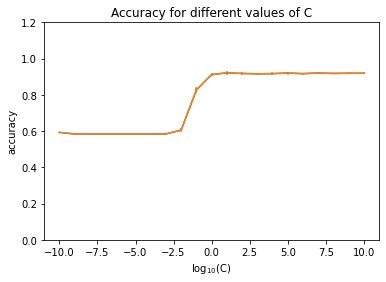

In [59]:
# パラメーターごとのスコアを図示する
import matplotlib.pyplot as plt
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')
plt.show()

In [60]:
# 後でnp.argmaxを使いたいので、リストからnumpyアレイに変換しておく。
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [61]:
all_scores_mean.max()

0.9213383442948114

In [62]:
max_index = np.argmax(all_scores_mean)
max_index

11

In [63]:
# 最適なパラメーターをテストデータに適用する
clf.C = 10 ** C_range_exp[max_index]
clf.fit(X_train_vec_kanji, y_train)
clf.score(X_test_vec_kanji, y_test)

0.9527896995708155

In [64]:
# テストデータの判定結果を具体的に眺めてみる。
pred_kanji = clf.predict(X_test_vec_kanji)
for i in range(len(X_test)):
    if y_test.iloc[i] == pred_kanji[i]:
        print(y_test.iloc[i], pred_kanji[i], X_test.iloc[i,0], X_test.iloc[i,1])
    else:
        print(y_test.iloc[i], pred_kanji[i], X_test.iloc[i,0], X_test.iloc[i,1], '!')


2 2 道子 ﾐﾁｺ
2 2 彩佳 ｱﾔｶ
2 2 明子 ｱｷｺ
1 1 進一 ｼﾝｲﾁ
2 2 香里 ｶｵﾘ
1 1 大 ﾏｻﾙ
2 2 萌 ﾓｴ
1 1 裕 ﾕｳ
1 1 駿太 ｼｭﾝﾀ
1 1 丈 ｼﾞｮｳ
1 1 誠也 ｾｲﾔ
2 2 美玖 ﾐｸ
2 2 あずさ ｱｽﾞｻ
2 2 真央 ﾏｵ
1 1 俊介 ｼｭﾝｽｹ
1 1 慎之介 ｼﾝﾉｽｹ
1 1 駿介 ｼｭﾝｽｹ
1 1 翼 ﾂﾊﾞｻ
1 1 雄太 ﾕｳﾀ
1 1 知輝 ﾄﾓｷ
1 1 直樹 ﾅｵｷ
2 2 麻由 ﾏﾕ
1 1 雄基 ﾕｳｷ
2 2 友梨 ﾕﾘ
2 2 里美 ｻﾄﾐ
2 2 千明 ﾁｱｷ
1 1 賢吾 ｹﾝｺﾞ
1 1 智之 ﾄﾓﾕｷ
1 1 大希 ﾀﾞｲｷ
2 2 理子 ﾘｺ
1 1 佳樹 ﾖｼｷ
2 2 千晴 ﾁﾊﾙ
1 1 浩太郎 ｺｳﾀﾛｳ
1 1 和行 ｶｽﾞﾕｷ
2 1 真澄 ﾏｽﾐ !
1 1 孝幸 ﾀｶﾕｷ
2 2 美佳 ﾐｶ
2 2 夏希 ﾅﾂｷ
1 1 寛之 ﾋﾛﾕｷ
1 1 翔太朗 ｼｮｳﾀﾛｳ
2 2 梨奈 ﾘﾅ
1 1 諒太 ﾘｮｳﾀ
1 1 大志 ﾀﾞｲｼ
1 1 崚 ﾘｮｳ
1 1 克己 ｶﾂﾐ
1 1 猛 ﾀｹｼ
1 1 拓未 ﾀｸﾐ
1 1 俊貴 ﾄｼｷ
1 1 智 ｻﾄｼ
1 1 勝彦 ｶﾂﾋｺ
1 1 夏樹 ﾅﾂｷ
2 2 智子 ｻﾄｺ
2 2 莉帆 ﾘﾎ
1 1 謙一 ｹﾝｲﾁ
1 1 正之 ﾏｻﾕｷ
1 1 洋 ﾋﾛｼ
2 2 真里奈 ﾏﾘﾅ
1 1 俊平 ｼｭﾝﾍﾟｲ
2 2 百花 ﾓﾓｶ
2 2 聡美 ｻﾄﾐ
1 1 雅史 ﾏｻｼ
1 1 裕樹 ﾋﾛｷ
1 1 祐亮 ﾕｳｽｹ
2 2 沙紀 ｻｷ
1 1 謙 ｹﾝ
1 1 弘 ﾋﾛｼ
2 2 千絵 ﾁｴ
1 1 智樹 ﾄﾓｷ
2 1 由貴 ﾕｷ !
1 1 貴史 ﾀｶﾌﾐ
1 1 雄輝 ﾕｳｷ
1 1 克哉 ｶﾂﾔ
1 1 直弥 ﾅｵﾔ
2 2 みなみ ﾐﾅﾐ
2 2 久美子 ｸﾐｺ
2 2 奈美 ﾅﾐ
2 2 里香 ﾘｶ
2 2 久美 ｸﾐ
1 1 光太郎 ｺｳﾀﾛｳ
1 1 俊 ｼｭﾝ
1 1 孝志 ﾀｶｼ
1 1 快 ｶｲ
2 2 真由子 ﾏﾕｺ
1 1 勇気 ﾕｳｷ
2 2 百香 ﾓﾓｶ
2 1 小百合 ｻﾕﾘ !
1 1 岳 ｶﾞｸ
2 2 恵美 ﾒｸﾞﾐ
1 1 祥太 ｼｮｳﾀ


## 名前（カナ）をngramに変換した特徴量を使って性別判定する

In [65]:
# CountVectorizerを設定する。（文字単位、ngramの範囲は1～2）
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2))

In [66]:
# 特徴量を計算（fit）する。
# （訓練データで計算（fit）してから、その結果を使って訓練データとテストデータを変換（transform）する。）
vectorizer.fit(X_train['名前（カナ）'])

CountVectorizer(analyzer='char', ngram_range=(1, 2))

In [67]:
# 参考に特徴量名を取り出して眺めてみる。
feature_kana = vectorizer.get_feature_names()
print(feature_kana)

['ｭ', 'ｭｳ', 'ｭﾘ', 'ｭﾝ', 'ｮ', 'ｮｳ', 'ｯ', 'ｯﾍ', 'ｱ', 'ｱｲ', 'ｱｵ', 'ｱｶ', 'ｱｷ', 'ｱｹ', 'ｱｻ', 'ｱｽ', 'ｱﾂ', 'ｱﾐ', 'ｱﾔ', 'ｱﾕ', 'ｱﾗ', 'ｱﾘ', 'ｱﾝ', 'ｲ', 'ｲｯ', 'ｲｲ', 'ｲｶ', 'ｲｷ', 'ｲｺ', 'ｲｻ', 'ｲｼ', 'ｲｽ', 'ｲｾ', 'ｲﾀ', 'ｲﾁ', 'ｲﾂ', 'ｲﾄ', 'ｲﾅ', 'ｲﾔ', 'ｲﾖ', 'ｲﾘ', 'ｲﾜ', 'ｳ', 'ｳｲ', 'ｳｶ', 'ｳｷ', 'ｳｺ', 'ｳｻ', 'ｳｼ', 'ｳｽ', 'ｳﾀ', 'ｳﾄ', 'ｳﾅ', 'ｳﾉ', 'ｳﾍ', 'ｳﾏ', 'ｳﾔ', 'ｴ', 'ｴｲ', 'ｴｶ', 'ｴｺ', 'ｴﾂ', 'ｴﾃ', 'ｴﾐ', 'ｴﾘ', 'ｵ', 'ｵｲ', 'ｵｷ', 'ｵｺ', 'ｵｻ', 'ｵﾄ', 'ｵﾐ', 'ｵﾔ', 'ｵﾘ', 'ｵﾙ', 'ｶ', 'ｶｱ', 'ｶｲ', 'ｶｴ', 'ｶｵ', 'ｶｹ', 'ｶｺ', 'ｶｻ', 'ｶｼ', 'ｶｽ', 'ｶﾂ', 'ｶﾅ', 'ｶﾈ', 'ｶﾉ', 'ｶﾋ', 'ｶﾔ', 'ｶﾕ', 'ｶﾖ', 'ｶﾗ', 'ｶﾘ', 'ｶﾙ', 'ｶﾝ', 'ｶﾞ', 'ｷ', 'ｷｮ', 'ｷｴ', 'ｷｵ', 'ｷｺ', 'ｷﾉ', 'ｷﾋ', 'ｷﾔ', 'ｷﾖ', 'ｷﾗ', 'ｷﾞ', 'ｸ', 'ｸﾄ', 'ｸﾏ', 'ｸﾐ', 'ｸﾑ', 'ｸﾔ', 'ｸﾗ', 'ｸﾙ', 'ｸﾛ', 'ｸﾞ', 'ｹ', 'ｹｲ', 'ｹｼ', 'ｹﾐ', 'ｹﾙ', 'ｹﾝ', 'ｹﾞ', 'ｺ', 'ｺｳ', 'ｺﾄ', 'ｺﾞ', 'ｻ', 'ｻｱ', 'ｻｵ', 'ｻｶ', 'ｻｷ', 'ｻｸ', 'ｻｺ', 'ｻｼ', 'ｻﾁ', 'ｻﾄ', 'ｻﾋ', 'ｻﾐ', 'ｻﾑ', 'ｻﾔ', 'ｻﾕ', 'ｻﾖ', 'ｻﾗ', 'ｻﾙ', 'ｼ', 'ｼｭ', 'ｼｮ', 'ｼｵ', 'ｼｹ', 'ｼｺ', 'ｼｽ', 'ｼﾄ', 'ｼﾉ', 'ｼﾋ', 'ｼﾎ', 'ｼﾐ', 'ｼﾔ', 'ｼﾕ', 'ｼﾝ', 'ｼﾞ', 'ｽ', 'ｽｶ', 'ｽｸ', 'ｽｹ', 'ｽｺ', '

In [68]:
# データXを特徴量に変換（transform）する。
# （訓練データで計算（fit）してから、その結果を使って訓練データとテストデータを変換（transform）する。）
X_train_vec_kana = vectorizer.transform(X_train['名前（カナ）'])
X_test_vec_kana = vectorizer.transform(X_test['名前（カナ）'])

In [69]:
# 参考に変換後の訓練データを眺めてみる。
# 特徴量を全部見るのは量が多くて大変なので100個おきに飛ばしながら
# ほとんどの要素は0だが、たまに1が現れるので、その場合はプリントする。

i = 0 # 訓練データのi番目に注目する。
n_kana = len(feature_kana)
for j in range(n_kana):
    if j % 100 == 0:
        print(X_train.iloc[i,1], j, feature_kana[j], X_train_vec_kana[i,j])
    if X_train_vec_kana[i,j] != 0:
        print(X_train.iloc[i,1], j, feature_kana[j], X_train_vec_kana[i,j])

ｼｮｳｺﾞ 0 ｭ 0
ｼｮｳｺﾞ 4 ｮ 1
ｼｮｳｺﾞ 5 ｮｳ 1
ｼｮｳｺﾞ 42 ｳ 1
ｼｮｳｺﾞ 46 ｳｺ 1
ｼｮｳｺﾞ 100 ｷｴ 0
ｼｮｳｺﾞ 126 ｺ 1
ｼｮｳｺﾞ 129 ｺﾞ 1
ｼｮｳｺﾞ 148 ｼ 1
ｼｮｳｺﾞ 150 ｼｮ 1
ｼｮｳｺﾞ 200 ﾁﾋ 0
ｼｮｳｺﾞ 300 ﾐｳ 0
ｼｮｳｺﾞ 400 ﾛﾕ 0
ｼｮｳｺﾞ 417 ﾞ 1


In [70]:
# 機械学習する（パラメーターCを変えながら）
clf = linear_model.LogisticRegression()
C_range_exp = np.linspace(start=-10, stop=10, num=21)
C_range = 10 ** C_range_exp
all_scores_mean = []
all_scores_std = []
for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train_vec_kana, y_train, cv=3)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

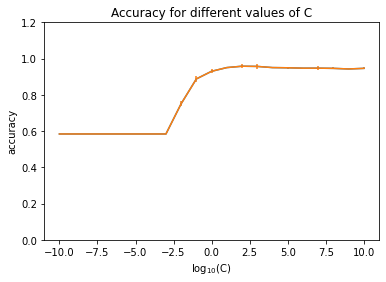

In [71]:
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')
plt.show()

In [72]:
# 後でnp.argmaxを使いたいので、リストからnumpyアレイに変換しておく。
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [73]:
all_scores_mean.max()

0.9579775202700351

In [74]:
max_index = np.argmax(all_scores_mean)
max_index

12

In [75]:
# 最適なパラメーターをテストデータに適用する
clf.C = 10 ** C_range_exp[max_index]
clf.fit(X_train_vec_kana, y_train)
clf.score(X_test_vec_kana, y_test)

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9527896995708155

In [76]:
# テストデータの判定結果を具体的に眺めてみる。
pred_kana = clf.predict(X_test_vec_kana)
for i in range(len(X_test)):
    if y_test.iloc[i] == pred_kana[i]:
        print(y_test.iloc[i], pred_kana[i], X_test.iloc[i,0], X_test.iloc[i,1])
    else:
        print(y_test.iloc[i], pred_kana[i], X_test.iloc[i,0], X_test.iloc[i,1], '!')


2 2 道子 ﾐﾁｺ
2 2 彩佳 ｱﾔｶ
2 2 明子 ｱｷｺ
1 1 進一 ｼﾝｲﾁ
2 2 香里 ｶｵﾘ
1 1 大 ﾏｻﾙ
2 2 萌 ﾓｴ
1 1 裕 ﾕｳ
1 1 駿太 ｼｭﾝﾀ
1 1 丈 ｼﾞｮｳ
1 1 誠也 ｾｲﾔ
2 2 美玖 ﾐｸ
2 2 あずさ ｱｽﾞｻ
2 1 真央 ﾏｵ !
1 1 俊介 ｼｭﾝｽｹ
1 1 慎之介 ｼﾝﾉｽｹ
1 1 駿介 ｼｭﾝｽｹ
1 1 翼 ﾂﾊﾞｻ
1 1 雄太 ﾕｳﾀ
1 1 知輝 ﾄﾓｷ
1 1 直樹 ﾅｵｷ
2 2 麻由 ﾏﾕ
1 1 雄基 ﾕｳｷ
2 2 友梨 ﾕﾘ
2 2 里美 ｻﾄﾐ
2 2 千明 ﾁｱｷ
1 1 賢吾 ｹﾝｺﾞ
1 1 智之 ﾄﾓﾕｷ
1 1 大希 ﾀﾞｲｷ
2 2 理子 ﾘｺ
1 1 佳樹 ﾖｼｷ
2 2 千晴 ﾁﾊﾙ
1 1 浩太郎 ｺｳﾀﾛｳ
1 1 和行 ｶｽﾞﾕｷ
2 1 真澄 ﾏｽﾐ !
1 1 孝幸 ﾀｶﾕｷ
2 2 美佳 ﾐｶ
2 2 夏希 ﾅﾂｷ
1 1 寛之 ﾋﾛﾕｷ
1 1 翔太朗 ｼｮｳﾀﾛｳ
2 2 梨奈 ﾘﾅ
1 1 諒太 ﾘｮｳﾀ
1 1 大志 ﾀﾞｲｼ
1 1 崚 ﾘｮｳ
1 2 克己 ｶﾂﾐ !
1 1 猛 ﾀｹｼ
1 1 拓未 ﾀｸﾐ
1 1 俊貴 ﾄｼｷ
1 1 智 ｻﾄｼ
1 1 勝彦 ｶﾂﾋｺ
1 2 夏樹 ﾅﾂｷ !
2 2 智子 ｻﾄｺ
2 2 莉帆 ﾘﾎ
1 1 謙一 ｹﾝｲﾁ
1 1 正之 ﾏｻﾕｷ
1 1 洋 ﾋﾛｼ
2 2 真里奈 ﾏﾘﾅ
1 1 俊平 ｼｭﾝﾍﾟｲ
2 2 百花 ﾓﾓｶ
2 2 聡美 ｻﾄﾐ
1 1 雅史 ﾏｻｼ
1 1 裕樹 ﾋﾛｷ
1 1 祐亮 ﾕｳｽｹ
2 2 沙紀 ｻｷ
1 1 謙 ｹﾝ
1 1 弘 ﾋﾛｼ
2 2 千絵 ﾁｴ
1 1 智樹 ﾄﾓｷ
2 2 由貴 ﾕｷ
1 1 貴史 ﾀｶﾌﾐ
1 1 雄輝 ﾕｳｷ
1 1 克哉 ｶﾂﾔ
1 1 直弥 ﾅｵﾔ
2 2 みなみ ﾐﾅﾐ
2 2 久美子 ｸﾐｺ
2 2 奈美 ﾅﾐ
2 2 里香 ﾘｶ
2 2 久美 ｸﾐ
1 1 光太郎 ｺｳﾀﾛｳ
1 1 俊 ｼｭﾝ
1 1 孝志 ﾀｶｼ
1 2 快 ｶｲ !
2 2 真由子 ﾏﾕｺ
1 1 勇気 ﾕｳｷ
2 2 百香 ﾓﾓｶ
2 2 小百合 ｻﾕﾘ
1 2 岳 ｶﾞｸ !
2 2 恵美 ﾒｸﾞﾐ
1 1 祥太

## 名前（漢字）名前（カナ）の両方をngramに変換した特徴量を使って性別判定する

In [77]:
# 特徴量 X_train_vec_kanji と X_train_vec_kana を横につなげる。（hstack）
# 実は X_train_vec_kanji と X_train_vec_kana は疎行列（sparse matrix）という形式で格納されている。
# 疎行列を横につなげるには scipy.sparse.hstack を使う。
import scipy
X_train_vec = scipy.sparse.hstack([X_train_vec_kanji, X_train_vec_kana])
X_test_vec =scipy.sparse.hstack([X_test_vec_kanji, X_test_vec_kana])

In [78]:
# 参考に特徴量名を取り出して眺めてみる。
feature = feature_kanji + feature_kana
print(feature)

['々', '々子', '々美', 'あ', 'あか', 'あす', 'あゆ', 'あり', 'い', 'いず', 'いづ', 'お', 'おり', 'おる', 'か', 'かお', 'かね', 'かり', 'かる', 'き', 'く', 'くら', 'くる', 'ぐ', 'ぐみ', 'さ', 'さお', 'さく', 'さと', 'さゆ', 'し', 'しの', 'す', 'すか', 'すみ', 'ず', 'ずき', 'ずみ', 'た', 'づ', 'づき', 'づみ', 'と', 'とみ', 'ど', 'どか', 'な', 'なた', 'なの', 'ね', 'の', 'のか', 'のぶ', 'のり', 'は', 'はる', 'ひ', 'ひか', 'ひと', 'ひな', 'ひろ', 'ぶ', 'ほ', 'ほの', 'ま', 'まど', 'まゆ', 'み', 'みず', 'みづ', 'みの', 'みゆ', 'みれ', 'め', 'めぐ', 'ゆ', 'ゆか', 'ゆき', 'ゆみ', 'ゆり', 'ら', 'り', 'りさ', 'る', 'るか', 'るみ', 'れ', 'ろ', 'ろみ', '一', '一也', '一哉', '一夫', '一希', '一平', '一幸', '一弘', '一彦', '一成', '一樹', '一男', '一真', '一貴', '一輝', '一郎', '一馬', '七', '七海', '乃', '久', '之', '之介', '也', '二', '亘', '亜', '亜季', '亜実', '亜希', '亜由', '亜紀', '亨', '京', '京介', '京子', '京香', '亮', '亮介', '亮佑', '亮太', '亮平', '亮祐', '亮輔', '人', '仁', '仁志', '仁美', '介', '代', '代子', '伸', '伸一', '伸也', '伸子', '佐', '佐子', '佐知', '佑', '佑太', '佑斗', '佑輔', '佑香', '作', '佳', '佳代', '佳祐', '侑', '侑也', '依', '俊', '俊一', '俊也', '俊幸', '俊彦', '保', '信', '信一', '信之', '信吾', '信子', '信行', '修', '修一', '修司', '修平', '健', '健一

In [79]:
# 参考に変換後の訓練データを眺めてみる。
# 特徴量を全部見るのは量が多くて大変なので100個おきに飛ばしながら
# ほとんどの要素は0だが、たまに1が現れるので、その場合はプリントする。

i = 0 # 訓練データのi番目に注目する。
n = n_kanji + n_kana
X_train_vec_array = X_train_vec.toarray()
for j in range(n):
    if j % 100 == 0:
        print(X_train.iloc[i,0], X_train.iloc[i,1], j, feature[j], X_train_vec_array[i,j])
    if X_train_vec_array[i,j] != 0:
        print(X_train.iloc[i,0], X_train.iloc[i,1], j, feature[j], X_train_vec_array[i,j])

翔吾 ｼｮｳｺﾞ 0 々 0
翔吾 ｼｮｳｺﾞ 100 一男 0
翔吾 ｼｮｳｺﾞ 200 優菜 0
翔吾 ｼｮｳｺﾞ 287 吾 1
翔吾 ｼｮｳｺﾞ 300 和希 0
翔吾 ｼｮｳｺﾞ 400 将太 0
翔吾 ｼｮｳｺﾞ 500 愛梨 0
翔吾 ｼｮｳｺﾞ 600 月 0
翔吾 ｼｮｳｺﾞ 700 満 0
翔吾 ｼｮｳｺﾞ 800 祐輝 0
翔吾 ｼｮｳｺﾞ 885 翔 1
翔吾 ｼｮｳｺﾞ 887 翔吾 1
翔吾 ｼｮｳｺﾞ 900 聖子 0
翔吾 ｼｮｳｺﾞ 1000 貴志 0
翔吾 ｼｮｳｺﾞ 1100 麻 0
翔吾 ｼｮｳｺﾞ 1117 ｮ 1
翔吾 ｼｮｳｺﾞ 1118 ｮｳ 1
翔吾 ｼｮｳｺﾞ 1155 ｳ 1
翔吾 ｼｮｳｺﾞ 1159 ｳｺ 1
翔吾 ｼｮｳｺﾞ 1200 ｶﾈ 0
翔吾 ｼｮｳｺﾞ 1239 ｺ 1
翔吾 ｼｮｳｺﾞ 1242 ｺﾞ 1
翔吾 ｼｮｳｺﾞ 1261 ｼ 1
翔吾 ｼｮｳｺﾞ 1263 ｼｮ 1
翔吾 ｼｮｳｺﾞ 1300 ﾀﾂ 0
翔吾 ｼｮｳｺﾞ 1400 ﾏｲ 0
翔吾 ｼｮｳｺﾞ 1500 ﾚ 0
翔吾 ｼｮｳｺﾞ 1530 ﾞ 1


In [80]:
# 機械学習する（パラメーターCを変えながら）
clf = linear_model.LogisticRegression()
C_range_exp = np.linspace(start=-10, stop=10, num=21)
C_range = 10 ** C_range_exp
all_scores_mean = []
all_scores_std = []
for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train_vec, y_train, cv=3)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

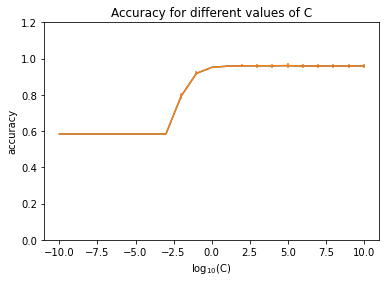

In [81]:
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')
plt.show()

In [82]:
# 後でnp.argmaxを使いたいので、リストからnumpyアレイに変換しておく。
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [83]:
all_scores_mean.max()

0.9612242057278073

In [84]:
max_index = np.argmax(all_scores_mean)
max_index

15

In [85]:
# 最適なパラメーターをテストデータに適用する
clf.C = 10 ** C_range_exp[max_index]
clf.fit(X_train_vec, y_train)
clf.score(X_test_vec, y_test)

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9613733905579399

In [86]:
# テストデータの判定結果を具体的に眺めてみる。
pred = clf.predict(X_test_vec)
for i in range(len(X_test)):
    if y_test.iloc[i] == pred[i]:
        print(y_test.iloc[i], pred[i], X_test.iloc[i,0], X_test.iloc[i,1], X_test.iloc[i,0])
    else:
        print(y_test.iloc[i], pred[i], X_test.iloc[i,0], X_test.iloc[i,1], X_test.iloc[i,0], '!')

2 2 道子 ﾐﾁｺ 道子
2 2 彩佳 ｱﾔｶ 彩佳
2 2 明子 ｱｷｺ 明子
1 1 進一 ｼﾝｲﾁ 進一
2 2 香里 ｶｵﾘ 香里
1 1 大 ﾏｻﾙ 大
2 2 萌 ﾓｴ 萌
1 1 裕 ﾕｳ 裕
1 1 駿太 ｼｭﾝﾀ 駿太
1 1 丈 ｼﾞｮｳ 丈
1 1 誠也 ｾｲﾔ 誠也
2 2 美玖 ﾐｸ 美玖
2 2 あずさ ｱｽﾞｻ あずさ
2 1 真央 ﾏｵ 真央 !
1 1 俊介 ｼｭﾝｽｹ 俊介
1 1 慎之介 ｼﾝﾉｽｹ 慎之介
1 1 駿介 ｼｭﾝｽｹ 駿介
1 1 翼 ﾂﾊﾞｻ 翼
1 1 雄太 ﾕｳﾀ 雄太
1 1 知輝 ﾄﾓｷ 知輝
1 1 直樹 ﾅｵｷ 直樹
2 2 麻由 ﾏﾕ 麻由
1 1 雄基 ﾕｳｷ 雄基
2 2 友梨 ﾕﾘ 友梨
2 2 里美 ｻﾄﾐ 里美
2 2 千明 ﾁｱｷ 千明
1 1 賢吾 ｹﾝｺﾞ 賢吾
1 1 智之 ﾄﾓﾕｷ 智之
1 1 大希 ﾀﾞｲｷ 大希
2 2 理子 ﾘｺ 理子
1 1 佳樹 ﾖｼｷ 佳樹
2 2 千晴 ﾁﾊﾙ 千晴
1 1 浩太郎 ｺｳﾀﾛｳ 浩太郎
1 1 和行 ｶｽﾞﾕｷ 和行
2 1 真澄 ﾏｽﾐ 真澄 !
1 1 孝幸 ﾀｶﾕｷ 孝幸
2 2 美佳 ﾐｶ 美佳
2 2 夏希 ﾅﾂｷ 夏希
1 1 寛之 ﾋﾛﾕｷ 寛之
1 1 翔太朗 ｼｮｳﾀﾛｳ 翔太朗
2 2 梨奈 ﾘﾅ 梨奈
1 1 諒太 ﾘｮｳﾀ 諒太
1 1 大志 ﾀﾞｲｼ 大志
1 1 崚 ﾘｮｳ 崚
1 2 克己 ｶﾂﾐ 克己 !
1 1 猛 ﾀｹｼ 猛
1 1 拓未 ﾀｸﾐ 拓未
1 1 俊貴 ﾄｼｷ 俊貴
1 1 智 ｻﾄｼ 智
1 1 勝彦 ｶﾂﾋｺ 勝彦
1 1 夏樹 ﾅﾂｷ 夏樹
2 2 智子 ｻﾄｺ 智子
2 2 莉帆 ﾘﾎ 莉帆
1 1 謙一 ｹﾝｲﾁ 謙一
1 1 正之 ﾏｻﾕｷ 正之
1 1 洋 ﾋﾛｼ 洋
2 2 真里奈 ﾏﾘﾅ 真里奈
1 1 俊平 ｼｭﾝﾍﾟｲ 俊平
2 2 百花 ﾓﾓｶ 百花
2 2 聡美 ｻﾄﾐ 聡美
1 1 雅史 ﾏｻｼ 雅史
1 1 裕樹 ﾋﾛｷ 裕樹
1 1 祐亮 ﾕｳｽｹ 祐亮
2 2 沙紀 ｻｷ 沙紀
1 1 謙 ｹﾝ 謙
1 1 弘 ﾋﾛｼ 弘
2 2 千絵 ﾁｴ 千絵
1 1 智樹 ﾄﾓｷ 智樹
2 2 由貴 ﾕｷ 由貴
1 1 貴史 ﾀｶﾌﾐ 貴史
1 1 雄輝 